In [1]:
! ls data/
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

BX-Police.csv     Sales.csv         budget-sample.csv
Iris.csv          Stocks.csv


# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [2]:
df1=pd.read_csv('data/budget-sample.csv')

print("shape of df:",df1.shape)
df1.head()

shape of df: (16660, 17)


,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,826,DEPT OF ENVIRONMENT PROTECTION,BROWN,TRACYANN,NaN,02/23/2004,QUEENS,COMMUNITY ASSISTANT,ACTIVE,37816.0,per Annum,2080.0,37235.48,11.00,206.04,1309.56
1,2020,56,POLICE DEPARTMENT,WONG,CHIWAI,NaN,07/08/2015,BROOKLYN,POLICE OFFICER,ACTIVE,63125.0,per Annum,2080.0,60758.85,343.13,10842.71,10325.31
2,2020,742,DEPT OF ED PEDAGOGICAL,FARRELL,TARA,E,09/09/1996,MANHATTAN,TEACHER SPECIAL EDUCATION,ACTIVE,121226.0,per Annum,0.0,118638.72,0.00,0.00,13069.69
3,2020,827,DEPARTMENT OF SANITATION,ATTANASIO,JOSEPH,NaN,10/18/1999,QUEENS,SANITATION WORKER,ACTIVE,77318.0,per Annum,2080.0,75833.83,455.50,28225.89,17602.11
4,2020,744,DEPT OF ED PARA PROFESSIONALS,MCNEIL,GLORIA,D,09/28/1989,MANHATTAN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.00,0.00,5076.22


## Data inspection

In [9]:
df1.isnull().sum()

fiscal_year                      0
payroll_number                   0
agency_name                      0
last_name                       18
first_name                      18
mid_init                      6706
agency_start_date                3
work_location_borough            0
title_description                1
leave_status_as_of_june_30       0
base_salary                      0
pay_basis                        0
regular_hours                    0
regular_gross_paid               0
ot_hours                         0
total_ot_paid                    0
total_other_pay                  0
dtype: int64

In [ ]:
df1.duplicated().sum()

## Data visualization

the distribution is more skewed toward left


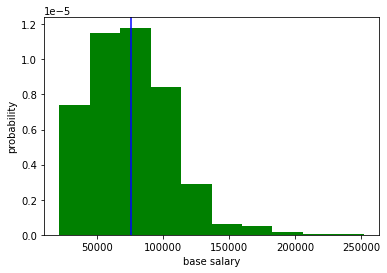

In [22]:
plt.hist(df1['base_salary'],density=True, facecolor='g')
plt.xlabel('base salary')
plt.ylabel("probability")
plt.axvline(x =df1.base_salary.mean(), color = 'b')
print("the distribution is more skewed toward left")

we have a lot of outliers whose base salaries are really higher


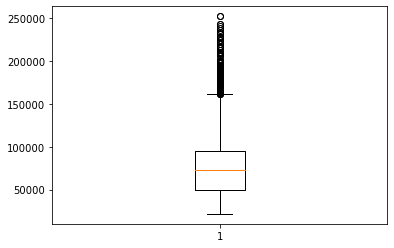

In [3]:
plt.boxplot(df1['base_salary'])
print("we have a lot of outliers whose base salaries are really higher")

In [30]:
df1['work_location_borough'].value_counts()

MANHATTAN    11083
QUEENS        2367
BROOKLYN      2121
BRONX         1089
Name: work_location_borough, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8f9dec9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8f9decf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8f9dec6d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb8f9dfd520>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8f9dfd7f0>,
 'means': []}

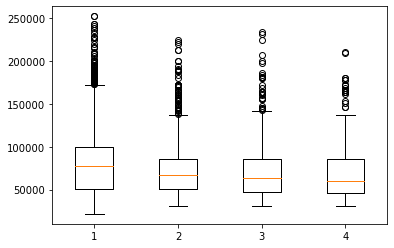

In [39]:
# Multiple box plots on one Axes
data_Manhattan=df1[df1['work_location_borough']=='MANHATTAN']
data_queens=df1[df1['work_location_borough']=='QUEENS']
data_brooklyn=df1[df1['work_location_borough']=='BROOKLYN']
data_bronx=df1[df1['work_location_borough']=='BRONX']
data =[list(data_Manhattan['base_salary']), list(data_queens['base_salary']), list(data_brooklyn['base_salary']), list(data_bronx['base_salary'])]
fig, ax = plt.subplots()
ax.boxplot(data)

In [5]:
gb_agency=df1.groupby('agency_name')
gb_agency['base_salary'].mean()

agency_name
ADMIN FOR CHILDREN'S SVCS       68875.882353
ADMIN TRIALS AND HEARINGS       57382.421053
BOARD OF CORRECTION             73305.000000
BOARD OF ELECTION               55018.659574
BOROUGH PRESIDENT-BRONX        112743.000000
                                   ...      
PUBLIC ADVOCATE                 83339.802500
QUEENS COMMUNITY BOARD #8      126801.000000
TAX COMMISSION                 129626.700000
TAXI & LIMOUSINE COMMISSION     61411.878788
TEACHERS RETIREMENT SYSTEM      85316.315789
Name: base_salary, Length: 87, dtype: float64

In [13]:
df1['agency_name']

# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [3]:
df2=pd.read_csv('data/BX-Police.csv')
df2.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56


In [19]:
df2['base_salary'].isnull().sum()
df2.duplicated().sum()

0

In [8]:
gb_year=df2.groupby('fiscal_year')
gb_year['fiscal_year'].count()

fiscal_year
2015    352
2016    327
2017    380
2018    375
2019    386
2020    381
2021    373
Name: fiscal_year, dtype: int64

In [12]:
gb_year['base_salary'].mean()

fiscal_year
2015    61299.402898
2016    61601.310642
2017    65231.981895
2018    65147.201387
2019    64427.547047
2020    67625.692756
2021    68584.475576
Name: base_salary, dtype: float64

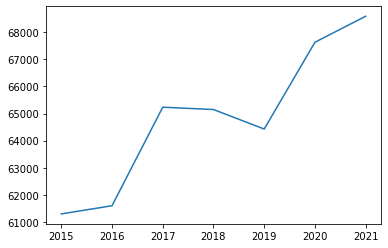

In [14]:
plt.plot([2015,2016,2017,2018,2019,2020,2021],gb_year['base_salary'].mean())

# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [15]:
df3=pd.read_csv('data/Stocks.csv')
df3.head()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG


Text(0, 0.5, 'Adj Close')

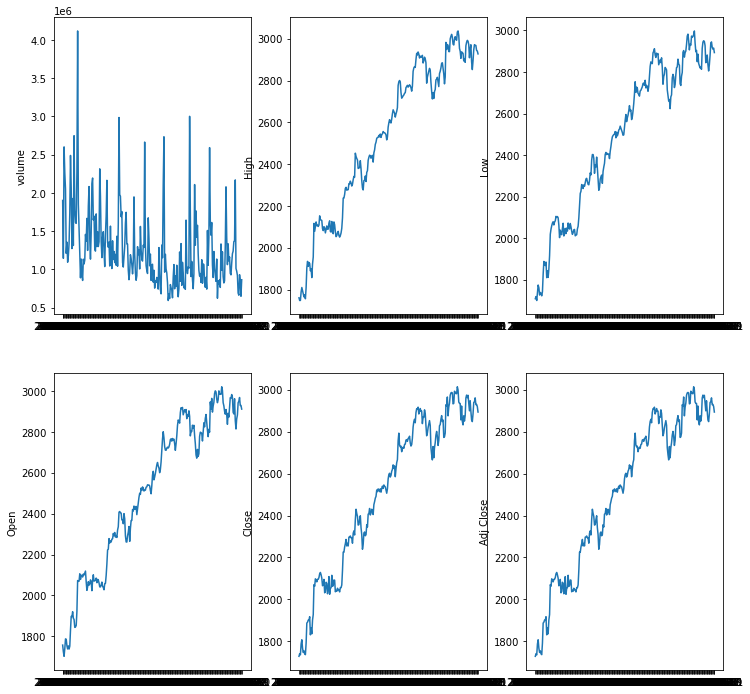

In [27]:
fig, ax=plt.subplots(2,3,figsize=(12,12))
ax[0,0].plot(df3['Date'],df3['Volume'])
ax[0,0].set_ylabel('volume')

ax[0,1].plot(df3['Date'],df3['High'])
ax[0,1].set_ylabel('High')
ax[0,2].plot(df3['Date'],df3['Low'])
ax[0,2].set_ylabel('Low')

ax[1,0].plot(df3['Date'],df3['Open'])
ax[1,1].plot(df3['Date'],df3['Close'])
ax[1,2].plot(df3['Date'],df3['Adj Close'])
ax[1,0].set_ylabel('Open')
ax[1,1].set_ylabel('Close')
ax[1,2].set_ylabel('Adj Close')

# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [6]:
df4=pd.read_csv('data/Sales.csv')
df4

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740
5,6,2760,1555,4890,7490,1890,1555
6,7,2980,1120,4780,8980,1780,1120
7,8,3700,1400,5860,9960,2860,1400
8,9,3540,1780,6100,8100,2100,1780
9,10,1990,1890,8300,10300,2300,1890


<AxesSubplot:xlabel='month_number'>

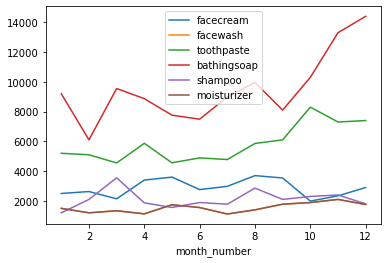

In [35]:
df4.plot(x='month_number',y=['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer'])

